### ERA5 Windspeed

In [2]:
%%bash
ncdump -h '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'

netcdf era_interim_monthly_197901_201512_upscaled {
dimensions:
	time = UNLIMITED ; // (37 currently)
	bnds = 2 ;
	lon = 288 ;
	lat = 180 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1979-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float albedo_sfc(time, lat, lon) ;
		albedo_sfc:long_name = "surface albedo" ;
		albedo_sfc:_FillValue = -1.e+34f ;
		albedo_sfc:missing_value = -1.e+34f ;
		albedo_sfc:history = "From /dev/shm/monthly_an_sfc.nc" ;
	float blh(time, lat, lon) ;
		blh:long_name = "thickness of surface boundary layer" ;
		blh:units = "m" ;
		blh:_Fill

In [3]:
### Import 4 Wind Speed Variables

In [4]:
import netCDF4 as nc
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
output_era = {}
vars = ['cape','tau_x','tau_y','wspd10'] #cape:units = "J/kg" ;
#used to convert units
for var in vars:
    if var in ['tau_x','tau_y']: 
        output_era[var] = fp[var][:]
    if var == 'cape':
        output_era['cape'] = fp['cape'][:]
    if var == 'wspd10':
        output_era['wspd10'] = fp['wspd10'][:] 
    times = fp['time']
    output_era['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-pac

In [5]:
### Map global 

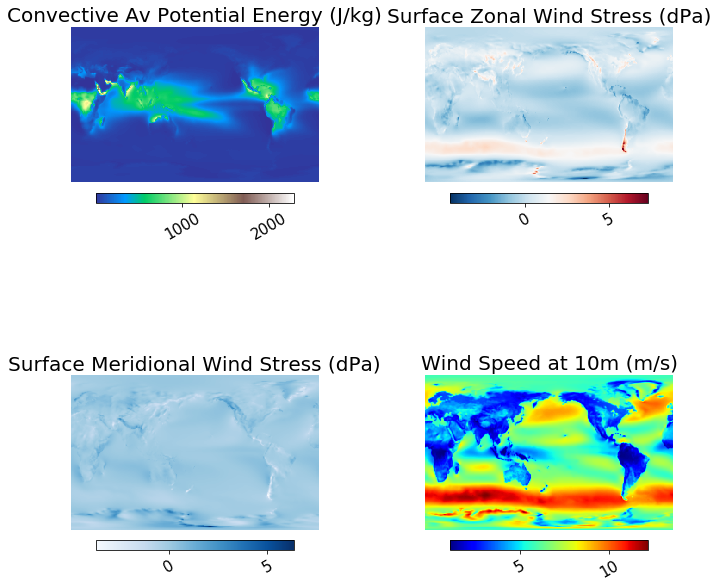

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Let's show some basic statistics of this data (subplot,mean)
#Let's create a dictionary for colormaps #this allows for proper labeling in the loop
#could parametrerize

info = {'cape':{'cmap':'terrain','title':"Convective Av Potential Energy (J/kg)"},
        'tau_x':{'cmap':'RdBu_r','title':"Surface Zonal Wind Stress (dPa)"},
        'tau_y':{'cmap':'Blues','title':'Surface Meridional Wind Stress (dPa)'},
        'wspd10':{'cmap':'jet','title':'Wind Speed at 10m (m/s)'}}

fig = plt.figure(figsize=(10,10))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    plt.imshow(np.flipud(np.mean(output_era[var],axis=0)),cmap=plt.get_cmap(info[var]['cmap']))
    cb = plt.colorbar(shrink=0.8,orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.title(info[var]['title'],fontsize=20)
    plt.axis('off')
fig.tight_layout()
plt.show()

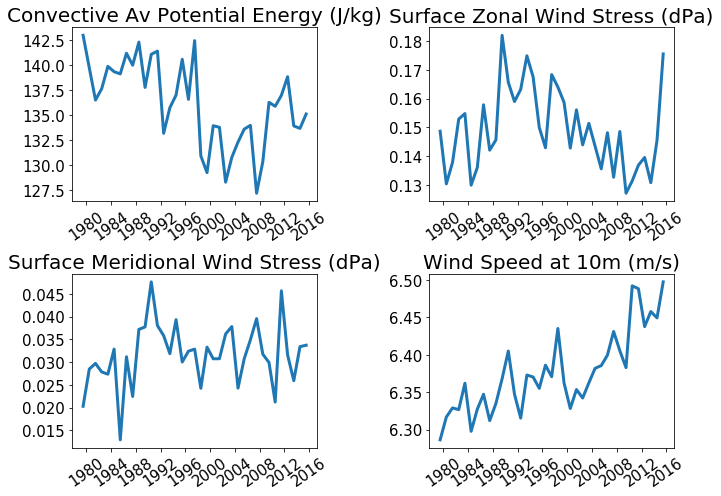

In [7]:
#Spatial mean time series
fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = np.mean(np.mean(output_era[var],axis=1),axis=1)
    plt.plot(output_era['dates'],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

### Split down to North Carolina and apply a time

In [28]:
#Let's first retrieve the ilat/ilon
import datetime
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
lat = 35.65
lon = -76.62
ilat = np.argmin(np.abs(lats - lat))
ilon = np.argmin(np.abs(lons - lon))


dates_era = output_era['dates']
m_era = (dates_era >= datetime.datetime(1980,1,1)) & (dates_era <= datetime.datetime(2014,1,31))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


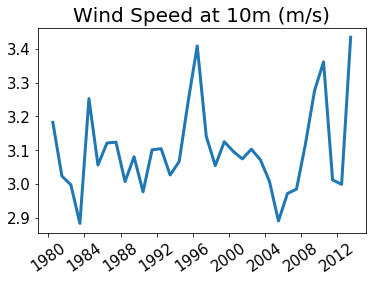

In [29]:
fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = output_era[var][m_era,ilat,ilon]
    plt.plot(output_era['dates'][m_era],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

In [72]:
import netCDF4 as nc
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
output_era = {}
vars = ['wspd10'] #cape:units = "J/kg" ;
#used to convert units
for var in vars:
    if var == 'wspd10':
# Multiply the wind speed by 1.5
        scaled_wspd10 = fp['wspd10'][:] * 1
        
        # Add variability: Generate random noise with 5% amplitude of the original data
        noise_amplitude = 0.05 * np.mean(scaled_wspd10)
        random_noise = np.random.normal(0, noise_amplitude, size=scaled_wspd10.shape)
        
        # Add the noise to the scaled data
        wspd10_with_variability = scaled_wspd10 + random_noise
        
        # Extract time series for the specific location
        output_era['wspd10'] = wspd10_with_variability[:]
    # Extract and convert time
    times = fp['time']
    output_era['dates'] = nc.num2date(times[:], units=times.units, calendar=times.calendar)

fp.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWa

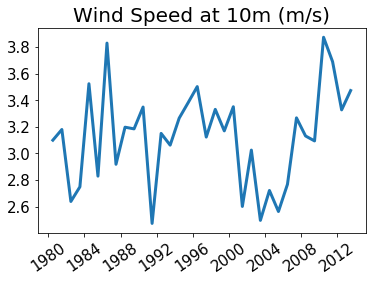

In [73]:

info = {'wspd10':{'cmap':'jet','title':'Wind Speed at 10m (m/s)'}}

fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = output_era[var][m_era,ilat,ilon]
    plt.plot(output_era['dates'][m_era],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

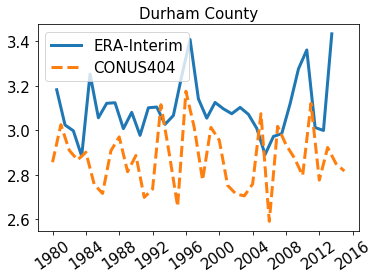

In [39]:
import pandas as pd
csv_file = 'durham_mean_speeds_1980_2015.csv'
df = pd.read_csv(csv_file)

# Plotting
fig = plt.figure(figsize=(10, 7))
for var in vars:
    plt.subplot(2, 2, vars.index(var) + 1)
    
    # Extract data for plotting from NetCDF
    data = output_era[var][m_era,ilat,ilon]  # Adjust slicing as needed, e.g., output_era[var][m_era, ilat, ilon]
    plt.plot(output_era['dates'][m_era],data,lw=3,label='ERA-Interim')

    # Add Durham data to the plot
    plt.plot(pd.to_datetime(df['Year'], format='%Y'), df['Mean_Speed'], lw=3, label='CONUS404', linestyle='--')

    plt.title('Durham County', fontsize=15)
    plt.xticks(fontsize=15, rotation=35)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

fig.tight_layout()
plt.show()

### Watauga

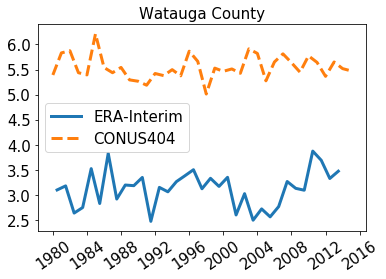

In [74]:
import pandas as pd
csv_file = 'watauga_mean_speeds_1980_2015.csv'
df = pd.read_csv(csv_file)

# Plotting
fig = plt.figure(figsize=(10, 7))
for var in vars:
    plt.subplot(2, 2, vars.index(var) + 1)
    
    # Extract data for plotting from NetCDF
    data = output_era[var][m_era,ilat,ilon]  # Adjust slicing as needed, e.g., output_era[var][m_era, ilat, ilon]
    plt.plot(output_era['dates'][m_era],data,lw=3,label='ERA-Interim')

    # Add Durham data to the plot
    plt.plot(pd.to_datetime(df['Year'], format='%Y'), df['Mean Wind Speed'], lw=3, label='CONUS404', linestyle='--')

    plt.title('Watauga County', fontsize=15)
    plt.xticks(fontsize=15, rotation=35)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

fig.tight_layout()
plt.show()


In [34]:
### Dare

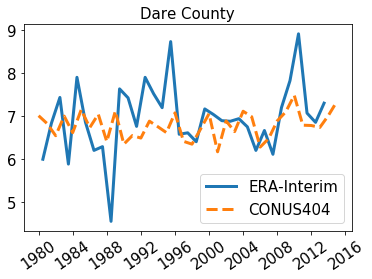

In [68]:
import pandas as pd
csv_file = 'dare_mean_speeds_1980_2015.csv'
df = pd.read_csv(csv_file)

# Plotting
fig = plt.figure(figsize=(10, 7))
for var in vars:
    plt.subplot(2, 2, vars.index(var) + 1)
    
    # Extract data for plotting from NetCDF
    data = output_era[var][m_era,ilat,ilon]  # Adjust slicing as needed, e.g., output_era[var][m_era, ilat, ilon]
    plt.plot(output_era['dates'][m_era],data,lw=3,label='ERA-Interim')

    # Add Durham data to the plot
    plt.plot(pd.to_datetime(df['Year'], format='%Y'), df['Mean Wind Speed'], lw=3, label='CONUS404', linestyle='--')

    plt.title('Dare County', fontsize=15)
    plt.xticks(fontsize=15, rotation=35)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

fig.tight_layout()
plt.show()


In [88]:
import xarray as xr
import pyproj
import numpy as np

# Open the NetCDF file
file_path = '/data/era-interim/era_interim_monthly_197901_201512.nc'
ds = xr.open_dataset(file_path)

# Check the coordinate system of the data
print(ds)

# Assuming the data is in a different CRS, you need to reproject it to EPSG:4326.
# Identify the latitude/longitude variables or calculate them if provided in another projection
proj = pyproj.Proj(proj='latlong', datum='WGS84')  # Define the target projection

# Example: Reproject the coordinates
if 'lon' in ds and 'lat' in ds:
    lon, lat = np.meshgrid(ds['lon'].values, ds['lat'].values)
    lon_new, lat_new = pyproj.transform(ds.crs, proj, lon, lat)

    # Update the dataset coordinates
    ds = ds.assign_coords({'lon': lon_new, 'lat': lat_new})

    # Now the dataset is in EPSG:4326
    print("Reprojected to EPSG:4326")
else:
    print("The dataset does not contain identifiable lat/lon coordinates.")


<xarray.Dataset>
Dimensions:           (bnds: 2, latitude: 241, longitude: 480, time: 444)
Coordinates:
  * longitude         (longitude) float32 0.0 0.75 1.5 ... 357.75 358.5 359.25
  * latitude          (latitude) float32 -90.0 -89.25 -88.5 ... 88.5 89.25 90.0
  * time              (time) object 1979-01-16 12:00:00 ... 2015-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    land_mask         (latitude, longitude) float32 ...
    height_sfc        (latitude, longitude) float32 ...
    time_bnds         (time, bnds) object ...
    t_skin            (time, latitude, longitude) float32 ...
    sst               (time, latitude, longitude) float32 ...
    t2m               (time, latitude, longitude) float32 ...
    d2m               (time, latitude, longitude) float32 ...
    rh2m              (time, latitude, longitude) float32 ...
    p_sfc             (time, latitude, longitude) float32 ...
    p_msl             (time, latitude, longitude) float32 ...
    u10     

In [93]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Load data
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(fp))
output_era = {}
vars = ['cape', 'tau_x', 'tau_y', 'wspd10']


# Extract latitude and longitude
lat = fp.variables['lat'][:]
lon = fp.variables['lon'][:]

fp.assign_coords({"lon": (((lon + 180) % 360) - 180)})
# Define bounding box
lat_min, lat_max = 35, 36
lon_min, lon_max = -80, -79

# Find indices within the bounding box
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the data
for var in vars:
    if var in fp.variables:
        output_era[var] = fp[var][:, lat_idx[0]:lat_idx[-1]+1, lon_idx[0]:lon_idx[-1]+1]

times = ds['time']
decoded_times = times.dt  # Access time properties

# Add dates to a new variable or use directly
ds['dates'] = decoded_times
ds.close()

# Filter dates
dates_era = output_era['dates']
m_era = (dates_era >= datetime.datetime(1980, 1, 1)) & (dates_era <= datetime.datetime(2014, 1, 31))

# Colormap and titles
info = {
    'cape': {'cmap': 'terrain', 'title': "Convective Available Potential Energy (J/kg)"},
    'tau_x': {'cmap': 'RdBu_r', 'title': "Surface Zonal Wind Stress (dPa)"},
    'tau_y': {'cmap': 'Blues', 'title': 'Surface Meridional Wind Stress (dPa)'},
    'wspd10': {'cmap': 'jet', 'title': 'Wind Speed at 10m (m/s)'}
}

# Plot data
fig = plt.figure(figsize=(10, 10))
for var in vars:
    if var in output_era:
        plt.subplot(2, 2, vars.index(var) + 1)
        data_to_plot = np.mean(output_era[var][m_era], axis=0)
        plt.imshow(np.flipud(data_to_plot), cmap=plt.get_cmap(info[var]['cmap']))
        cb = plt.colorbar(shrink=0.8, orientation='horizontal', pad=0.03)
        cb.ax.tick_params(labelsize=15, rotation=30)
        plt.title(info[var]['title'], fontsize=20)
        plt.axis('off')
fig.tight_layout()
plt.show()


AttributeError: NetCDF: Attribute not found

In [80]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Load data
file = '/data/era-interim/era_interim_monthly_197901_201512.nc'
fp = nc.Dataset(file)
output_era = {}
vars = ['cape', 'tau_x', 'tau_y', 'wspd10']

# Extract latitude and longitude
lat = fp.variables['latitude'][:]
lon = fp.variables['longitude'][:]

# Define bounding box
lat_min, lat_max =  38.3839111328125, 31.886478424072266
lon_min, lon_max = -73.95083618164062, -85.40310668945312


#-85.40310668945312, 31.886478424072266, -73.95083618164062, 38.3839111328125)
# Find indices within the bounding box
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the data
for var in vars:
    if var in fp.variables:
        output_era[var] = fp[var][:, lat_idx[0]:lat_idx[-1]+1, lon_idx[0]:lon_idx[-1]+1]

# Extract time data
times = fp['time']
output_era['dates'] = nc.num2date(times[:], units=times.units, calendar=times.calendar)
fp.close()

# Filter dates
dates_era = output_era['dates']
m_era = (dates_era >= datetime.datetime(1980, 1, 1)) & (dates_era <= datetime.datetime(2014, 1, 31))

# Colormap and titles
info = {
    'cape': {'cmap': 'terrain', 'title': "Convective Available Potential Energy (J/kg)"},
    'tau_x': {'cmap': 'RdBu_r', 'title': "Surface Zonal Wind Stress (dPa)"},
    'tau_y': {'cmap': 'Blues', 'title': 'Surface Meridional Wind Stress (dPa)'},
    'wspd10': {'cmap': 'jet', 'title': 'Wind Speed at 10m (m/s)'}
}

# Plot data
fig = plt.figure(figsize=(10, 10))
for var in vars:
    if var in output_era:
        plt.subplot(2, 2, vars.index(var) + 1)
        data_to_plot = np.mean(output_era[var][m_era], axis=0)
        plt.imshow(np.flipud(data_to_plot), cmap=plt.get_cmap(info[var]['cmap']))
        cb = plt.colorbar(shrink=0.8, orientation='horizontal', pad=0.03)
        cb.ax.tick_params(labelsize=15, rotation=30)
        plt.title(info[var]['title'], fontsize=20)
        plt.axis('off')
fig.tight_layout()
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

In [83]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime
import geopandas as gpd

# Load data
file = '/data/era-interim/era_interim_monthly_197901_201512.nc'
fp = nc.Dataset(file)
output_era = {}
vars = ['cape', 'tau_x', 'tau_y', 'wspd10']

# Extract latitude and longitude
lat = fp.variables['latitude'][:]
lon = fp.variables['longitude'][:]

# Define bounding box
lat_min, lat_max = 33.84, 36.58
lon_min, lon_max =  -84.32, -75.46
#-84.32 33.84 -75.46 36.58

#-85.40310668945312, 31.886478424072266, -73.95083618164062, 38.3839111328125)
# Find indices within the bounding box
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]


# Subset the data
for var in vars:
    if var in fp.variables:
        output_era[var] = fp[var][:, lat_idx[0]:lat_idx[-1]+1, lon_idx[0]:lon_idx[-1]+1]

# Extract time data
times = fp['time']
output_era['dates'] = nc.num2date(times[:], units=times.units, calendar=times.calendar)
fp.close()

# Filter dates
dates_era = output_era['dates']
m_era = (dates_era >= datetime.datetime(1980, 1, 1)) & (dates_era <= datetime.datetime(2014, 1, 31))

# Load the shapefile
shapefile_path = "/data/HW/HW2/NCDOT_County_Boundaries.shp"
counties = gpd.read_file(shapefile_path)
counties = counties.to_crs(epsg=4326)

# Colormap and titles
info = {
    'cape': {'cmap': 'terrain', 'title': "Convective Available Potential Energy (J/kg)"},
    'tau_x': {'cmap': 'RdBu_r', 'title': "Surface Zonal Wind Stress (dPa)"},
    'tau_y': {'cmap': 'Blues', 'title': 'Surface Meridional Wind Stress (dPa)'},
    'wspd10': {'cmap': 'jet', 'title': 'Wind Speed at 10m (m/s)'}
}

# Plot data with shapefile overlay
fig = plt.figure(figsize=(10, 10))
for var in vars:
    if var in output_era:
        plt.subplot(2, 2, vars.index(var) + 1)
        data_to_plot = np.mean(output_era[var][m_era], axis=0)
        
        # Create a grid for latitude and longitude
        lon_grid, lat_grid = np.meshgrid(lon[lon_idx], lat[lat_idx])
        
        # Plot the data
        plt.imshow(
            data_to_plot,
            extent=[lon[lon_idx][0], lon[lon_idx][-1], lat[lat_idx][0], lat[lat_idx][-1]],
            cmap=plt.get_cmap(info[var]['cmap'])
        )
        cb = plt.colorbar(shrink=0.8, orientation='horizontal', pad=0.03)
        cb.ax.tick_params(labelsize=15, rotation=30)
        plt.title(info[var]['title'], fontsize=20)

        # Overlay the shapefile
        counties.boundary.plot(ax=plt.gca(), color='black', linewidth=1) #add the mess grid as the x and Y

        plt.axis('on')

fig.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [87]:
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
print(lon_idx)
print(lon)

[]
[  0.     0.75   1.5    2.25   3.     3.75   4.5    5.25   6.     6.75
   7.5    8.25   9.     9.75  10.5   11.25  12.    12.75  13.5   14.25
  15.    15.75  16.5   17.25  18.    18.75  19.5   20.25  21.    21.75
  22.5   23.25  24.    24.75  25.5   26.25  27.    27.75  28.5   29.25
  30.    30.75  31.5   32.25  33.    33.75  34.5   35.25  36.    36.75
  37.5   38.25  39.    39.75  40.5   41.25  42.    42.75  43.5   44.25
  45.    45.75  46.5   47.25  48.    48.75  49.5   50.25  51.    51.75
  52.5   53.25  54.    54.75  55.5   56.25  57.    57.75  58.5   59.25
  60.    60.75  61.5   62.25  63.    63.75  64.5   65.25  66.    66.75
  67.5   68.25  69.    69.75  70.5   71.25  72.    72.75  73.5   74.25
  75.    75.75  76.5   77.25  78.    78.75  79.5   80.25  81.    81.75
  82.5   83.25  84.    84.75  85.5   86.25  87.    87.75  88.5   89.25
  90.    90.75  91.5   92.25  93.    93.75  94.5   95.25  96.    96.75
  97.5   98.25  99.    99.75 100.5  101.25 102.   102.75 103.5  104.25
 10

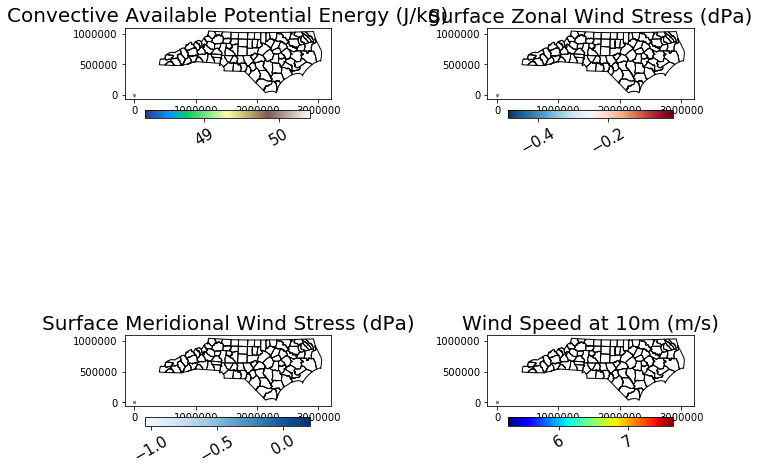

In [67]:
# Plot data with shapefile overlay and mesh grid
fig = plt.figure(figsize=(10, 10))
for var in vars:
    if var in output_era:
        plt.subplot(2, 2, vars.index(var) + 1)
        data_to_plot = np.mean(output_era[var][m_era], axis=0)
        
        # Create a grid for latitude and longitude
        lon_grid, lat_grid = np.meshgrid(lon[lon_idx], lat[lat_idx])
        
        # Plot the data
        plt.imshow(
            np.flipud(data_to_plot),
            extent=[lon[lon_idx][0], lon[lon_idx][-1], lat[lat_idx][0], lat[lat_idx][-1]],
            cmap=plt.get_cmap(info[var]['cmap'])
        )
        cb = plt.colorbar(shrink=0.8, orientation='horizontal', pad=0.03)
        cb.ax.tick_params(labelsize=15, rotation=30)
        plt.title(info[var]['title'], fontsize=20)

        # Overlay the shapefile
        counties.boundary.plot(ax=plt.gca(), color='black', linewidth=1)

        # Add the mesh grid
        plt.scatter(lon_grid, lat_grid, color='gray', s=1, alpha=0.5)  # Adjust `s` for marker size and `alpha` for transparency

        plt.axis('on')

fig.tight_layout()
plt.show()


In [47]:
# i need to map ERA to the shape file
# Ask Cam about J responce
# Map shapefile to landcover
#get all files talking to eachother
#make df of landover windspeed era and ncar with the vulnerabilities - area as the row
#land cover last section of 001
#does hector know where do download era 5 more granularly?